# Assignment 6
### Do Question 6, and three more questions of your choice.

In [34]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### 6. Some Common Distributions

For the following distributions:
- Determine the support
- Compute the density from the distribution for the logistic and exponential distributions (take a derivative)
- Plot the density and distribution for a variety of parameter values
- Take a sample of 1000 draws $(x_1, x_2, ..., x_{1000})$ from the distribution, plot a KDE and ECDF, visually compare with the theoretical pdf/cdf
- Find an example of this general type of PDF/CDF from the Metabric cancer data

You can use https://docs.scipy.org/doc/scipy/reference/stats.html to generate values for the pdf/cdf and generate samples of random variates.


- Logistic distribution (similar to normal): 
$$
F(x; \sigma) = \dfrac{1}{1+e^{-x/\sigma}} 
$$
with $\sigma >0$.
- Exponential distribution (similar to log-normal):
$$
F_X(x) = \begin{cases}
0, & x<0 \\
1 - e^{-\lambda x}, & x \ge 0,
\end{cases}
$$
with $\lambda > 0$.
- Negative Binomial (similar to Poisson): The probability mass function for positive integers is:
$$
f(k;r,p) = \dfrac{(k+r-1)!}{k!(r-1)!}(1-p)^k p^r, \quad \text{ for $k=0,...n$}
$$
You can interpret this as follows: Flip a coin that comes up heads with probability $p$ until you get $r$ heads, and then stop. What is the probability of stopping at each $k=0,1,2,...$?
- Categorical (similar to Bernoulli): The probability mass function over $k = 1, 2, ..., K$ categories is
$$
f(k;p_1,...,p_K) = p_1^{k=1}p_2^{k=2}...p_K^{k=K}
$$
where $0 \le p_i \le 1$ and $ \sum_{k=1}^K p_k = 1$.


---

#### Logistic distribution
The cumulative distribution function
$$
F(x; \sigma) = \dfrac{1}{1+e^{-x/\sigma}} 
$$
yields the probability density function
$$
f(x; \sigma) = \dfrac{e^{-x/\sigma}}{\sigma(1+e^{-x/\sigma})^2} 
$$
with $\sigma >0$.

The support for this distribution is $-\infty < x < \infty$

<!--
References

https://en.wikipedia.org/wiki/Logistic_distribution
https://www.acsu.buffalo.edu/~adamcunn/probability/logistic.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genlogistic.html#scipy.stats.genlogistic

-->

In [80]:
def plot_distributions(fx, Fx, distribution_name, scale_name="Scale", xmin=-10, xmax=10, xstep=0.1, scales=[0.5,1,2,5]):
    
    logistic = pd.DataFrame(columns=['x', scale_name, 'probability', 'cumulative'], dtype=np.float64)
    
    for scale in scales:
        for x in np.arange(xmin, xmax+xstep, xstep):
            probability = fx(scale, x)
            cumulative = Fx(scale, x)
            logistic.loc[len(logistic)] = [x, scale, probability, cumulative]
        
    plots = {'probability': 'Probability Density Function',
             'cumulative': 'Cumulative Distribution Function'
            }
    
    for column, title in plots.items():
        sns.lineplot(logistic, x='x', y=column, hue=scale_name, marker=None)
        plt.title(f'{title} of {distribution_name} Distribution')
        plt.xlabel('x')
        plt.ylabel('Probability')
        plt.grid(True, linestyle='--', color='gray', alpha=0.6)
        plt.show()

# def plot_samples(fx, distribution_name):

#     sigmas = [0.5, 1, 2, 5]
#     num_samples = 1000

#     samples = pd.DataFrame(columns=['value', 'sigma'], dtype=np.float64)

#     for sigma in sigmas:
#         random_samples = fx(sigma, num_samples)
#         for sample in random_samples:
#             samples.loc[len(samples)] = [sample, sigma]

#     sns.histplot(samples, x='value', hue='sigma', element='step', stat='density', common_norm=False)
#     plt.title(f'Sampled Values from {distribution_name} Distribution')
#     plt.xlabel('Value')
#     plt.ylabel('Density')
#     plt.grid(True, linestyle='--', color='gray', alpha=0.6)
#     plt.show()


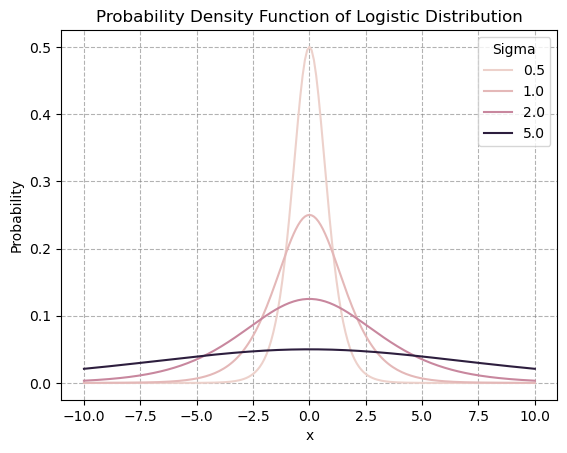

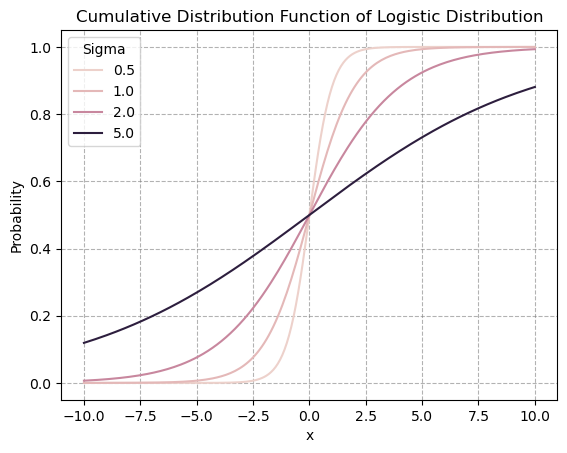

In [82]:
l_fx = lambda sigma, x: 1/sigma * (np.exp(-x/sigma) / ( (1 + np.exp(-x/sigma))**2 ))
l_Fx = lambda sigma, x: 1 / (1 + np.exp(-x/sigma))
plot_distributions(l_fx, l_Fx, 'Logistic', 'Sigma')



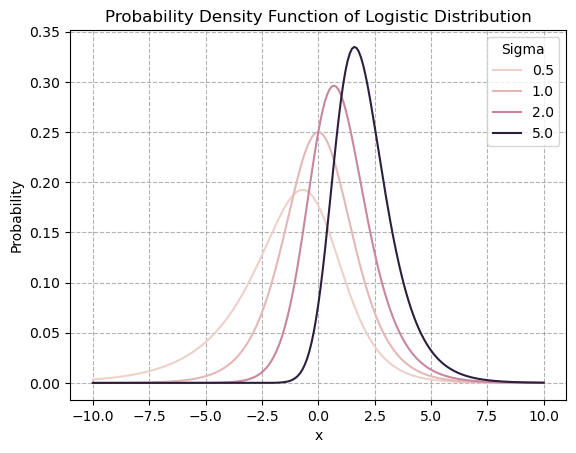

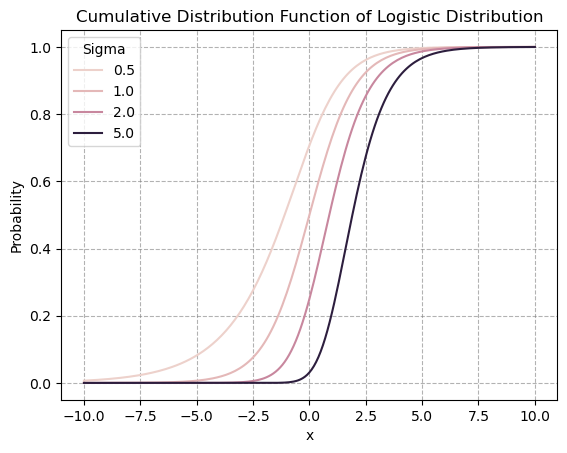

In [75]:
# Something is wrong here. My implementation above matches curves found online, but not gelogistic below.
# Is genlogistic the wrong distribution to use?
# Compare with:
# https://en.wikipedia.org/wiki/Logistic_distribution
# https://www.acsu.buffalo.edu/~adamcunn/probability/logistic.html
#
fx = lambda sigma, x: stats.genlogistic.pdf(x, c=sigma, scale=1, loc=0)
Fx = lambda sigma, x: stats.genlogistic.cdf(x, c=sigma, scale=1, loc=0)
plot_distributions(fx, Fx, 'Logistic', 'Sigma')

#### Exponential distribution
The cumulative distribution function
$$
F_X(x) = \begin{cases}
0, & x<0 \\
1 - e^{-\lambda x}, & x \ge 0,
\end{cases}
$$

yields the probability density function
$$
F_X(x) = \begin{cases}
0, & x<0 \\
\lambda e^{-\lambda x}, & x \ge 0,
\end{cases}
$$
with $\lambda > 0$.

The support for this distribution is $0 <= x < \infty$

<!--
References

https://en.wikipedia.org/wiki/Exponential_distribution
https://www.acsu.buffalo.edu/~adamcunn/probability/exponential.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon
-->

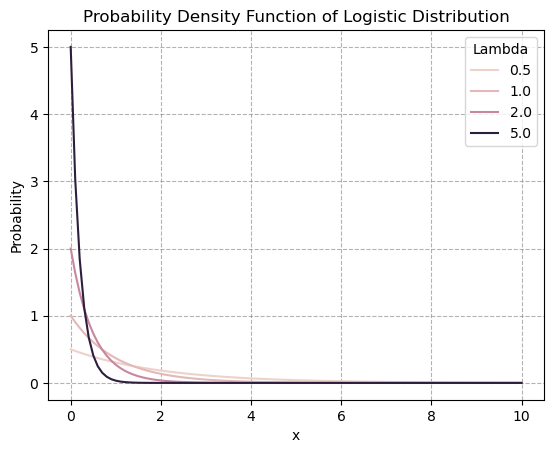

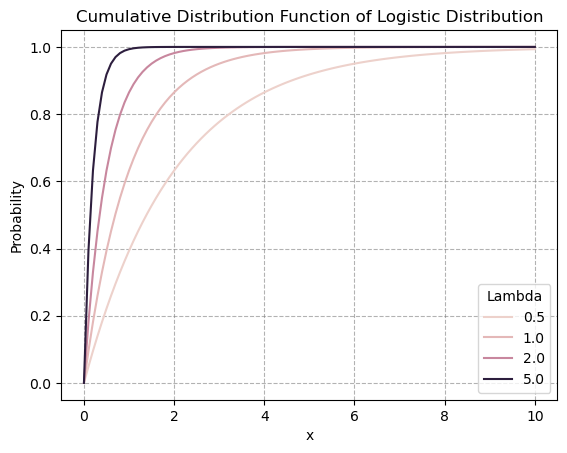

In [84]:
e_fx = lambda lam, x: lam * np.exp(-lam * x)
e_Fx = lambda lam, x: 1 - np.exp(-lam * x)
plot_distributions(e_fx, e_Fx, 'Logistic', 'Lambda', xmin=0)

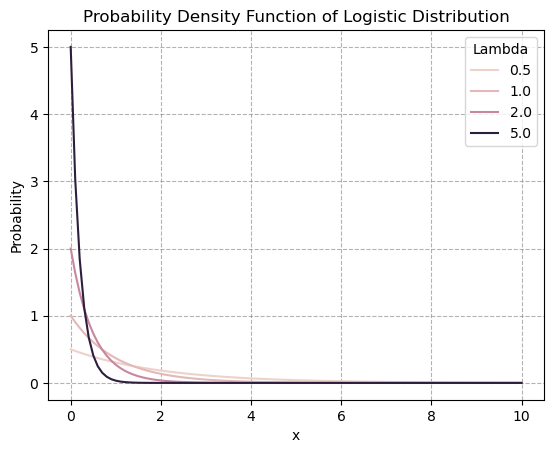

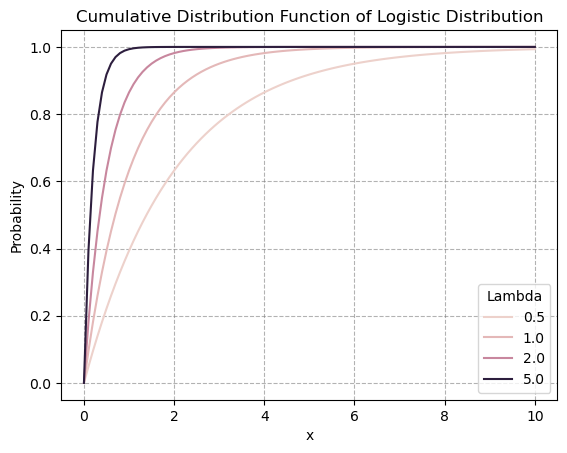

In [83]:
e_fx = lambda lam, x: stats.expon.pdf(x, scale=1/lam)
e_Fx = lambda lam, x: stats.expon.cdf(x, scale=1/lam)
plot_distributions(e_fx, e_Fx, 'Logistic', 'Lambda', xmin=0)